In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as pl

# Loading and pre-processing
Let's load and have a first look at the raw data

In [2]:
train_data = read_csv('../data/train.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


What are the features that compose the dataset?

In [4]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Before continuing, let's just define the meaning of the available features and variables, for clarity:

| Variable     | Definition                                 | Type | Key                               |
|--------------|--------------------------------------------|------|-----------------------------------|
| PassengerId  | ID of the passenger                        |  *   |                                   |
| Name         | passenger name                             |  *   |                                   |
| Survived     | passenger survived                         |  Categorical    | 0=No, 1=Yes                       |
| Pclass       | Ticket class                               |  Categorical (ordinal)   | 1=1st, 2=2nd, 3=3rd               |
| Sex          | passenger's gender                         |  Categorical    | male, female                      |
| Age          | passenger's age                            |  Numerical (continuous)      | (in years)                        |
| SibSp        | # of siblings / spouses aboard the Titanic |  Numerical (discrete)     |                                   |
| Parch        | # of parents / children aboard the Titanic |  Numerical (discrete)    |                                   |
| Ticket       | Ticket number                              |  *              |                                   |
| Fare         | Paid fare                                  |  Numerical (continuous)     |                                   |
| Cabin        | cabin number (if applicable)               |  *    |                                   |
| Parch        | # of parents / children aboard the Titanic |  Numerical (discrete)     |                                   |
| Embarked     | Port of embarcation                        |  Categorical    | C=Cherbourg, Q=Queenstown, S=Southampton|

Note that features marked with * are not usable (see below)

## Splitting the dataset 
Not all the information contained in the dataset is useful for our purposes so it is worth parsing the data to extract only the relevant features. For example, the name, ticket number or the cabin number are not usable features, since they are unique to each passenger. 

This can be done using pandas `drop` method

In [5]:
clean_train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Additionally, the survival field is the target label so it should be separated.

In [6]:
target_train = train_data.Survived
clean_train_data = clean_train_data.drop('Survived', axis=1)
clean_train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


# Exploratory analysis
To begin having a feel for the data, let's look at some of its statistical properties.

## Descriptive statistics
Let's start by having a look at the characteristics of the passangers. Note that the standard descriptive statistics are only applicable for numerical features:

In [7]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
clean_train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


[Text(0,0,'Pclass'),
 Text(0,0,'Age'),
 Text(0,0,'SibSp'),
 Text(0,0,'Parch'),
 Text(0,0,'Fare')]

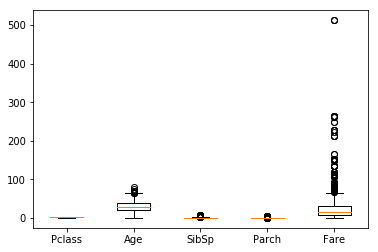

In [14]:
fig, ax = pl.subplots()
ax.boxplot([clean_train_data['Pclass'], clean_train_data['Age'][~np.isnan(clean_train_data['Age'])], clean_train_data['SibSp'], clean_train_data['Parch'], clean_train_data['Fare']])
labels = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
ax.set_xticklabels(labels)

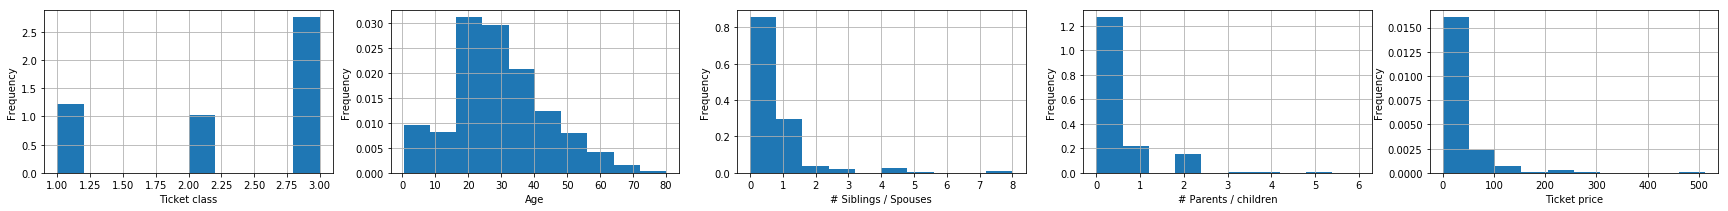

In [21]:
fig = pl.figure(figsize=(30, 3))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.hist(clean_train_data['Pclass'], density=True)
ax1.set_xlabel('Ticket class')
ax1.set_ylabel('Frequency')
ax1.grid()

ax2.hist(clean_train_data['Age'][~np.isnan(clean_train_data['Age'])], density=True)
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.grid()

ax3.hist(clean_train_data['SibSp'], density=True)
ax3.set_xlabel('# Siblings / Spouses')
ax3.set_ylabel('Frequency')
ax3.grid()

ax4.hist(clean_train_data['Parch'], density=True)
ax4.set_xlabel('# Parents / children')
ax4.set_ylabel('Frequency')
ax4.grid()

ax5.hist(clean_train_data['Fare'], density=True)
ax5.set_xlabel('Ticket price')
ax5.set_ylabel('Frequency')
ax5.grid()

What about the categorical features?

In [22]:
#describe categorical features
clean_train_data.describe(include=[np.object])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


### Feature correlations
Before continuing, it is informative to evaluate how the features relate to each other. It is particularly important to evaluate how the different features in the training set correlate with Survival (the target), as this informs us how predictive each feature is.

C:\Users\Rita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 1.        , -0.36922602,  0.08308136,  0.01844267, -0.54949962],
       [-0.36922602,  1.        , -0.30824676, -0.18911926,  0.09606669],
       [ 0.08308136, -0.30824676,  1.        ,  0.4148377 ,  0.15965104],
       [ 0.01844267, -0.18911926,  0.4148377 ,  1.        ,  0.21622494],
       [-0.54949962,  0.09606669,  0.15965104,  0.21622494,  1.        ]])

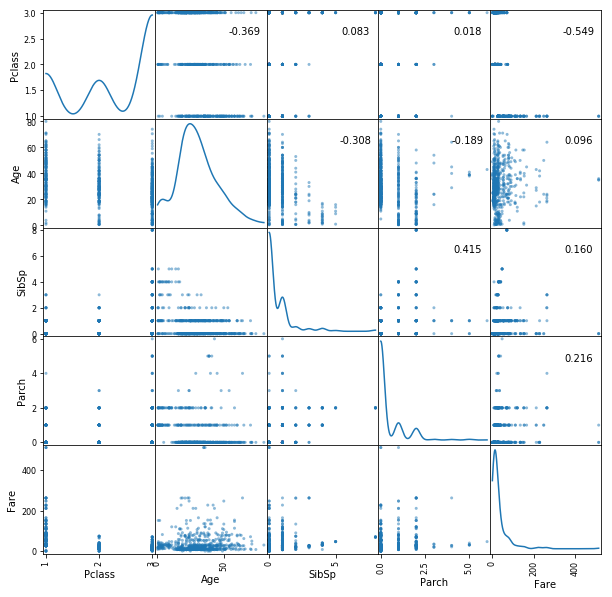

In [25]:
#kde = kernel density estimation - NaN values are extrapolated and approximated with kde
axes = scatter_matrix(clean_train_data, alpha=0.5, figsize=(10, 10), diagonal='kde')
corr = clean_train_data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
corr

The features that are more strongly (anti-)correlated are the ticket class and fare paid and, to a lesser extent, the ticket class and the age. How do the features correlate with the outcome (survival)?

In [15]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train_data[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()

,Age,Survived
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


In [18]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


To further analyse and later use the categorical features, we need to convert them to ordinal:

In [19]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [20]:
train_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.2375,0.000000
4,6.4375,0.000000
5,6.4500,0.000000
6,6.4958,0.000000
7,6.7500,0.000000
8,6.8583,0.000000
9,6.9500,0.000000


In [26]:
clean_train_data['Sex'] = clean_train_data['Sex'].map({'male': 0, 'female': 1}).astype(int)
clean_train_data['Embarked'] = clean_train_data['Embarked'].map({'S': 1, 'Q': 2, 'C': 3}).astype(int)
clean_train_data

ValueError: Cannot convert non-finite values (NA or inf) to integer

# Visualize the feature space
After all the clean-up and preparations, we are left with a relatively complex, high-dimensional feature space. Typically, the first step when dealing with data is to visually navigate the feature space to gain some insight into its underlying structure. For this, we can employ some simple dimensionality reduction techniques..

# Additional notes

## Feature engineering
This dataset can be enriched in multiple ways, taking into consideration the meaning of the features (this is adviced in the Kaggle challange description, feature engineering). For example:
* Title - the name of the passengers can be used to extract a new feature based on the title used by the person (Mr., Mrs., Dr., Lady, Countess, ...) 
* Family size - combining the number of siblings, spouses (Sbsp), parents and children (Parch) can generate a new feature of total family size
* Demographics - grouping the ages into intervals (converting it from a continuous numerical feature to an ordinal categorical one) can give rise to a new feature

## Resources
Additional, extended solutions for the challenge can be found here:
* [Example solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Best classifiers](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)